## Исследование рынка заведений общественного питания Москвы
Для открытия небольшого кафе в Москве, где персоналом являются роботы, в исследовании проанализированы данные заведений общественного питания, /datasets/rest_data.csv:

* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

Результатом исследования являются рекомендации о виде будущего заведения, количестве посадочных мест, районе расположения, а также подготовленная презентация для инвесторов в формате pdf, которая показывает текущее положение дел на рынке.

## Содержание исследования
_____

#### Подготовка:
* <a href="#step_1">1. Изучение файлов с данными, получение общей информации, загрузка библиотек.</a>
* <a href="#step_2">2. Предобработка данных.</a>

#### Анализ данных:
* <a href="#step_31">3.1 Cоотношение видов объектов общественного питания по количеству.</a>
* <a href="#step_32">3.2 Cоотношение сетевых и несетевых заведений по количеству.</a>
* <a href="#step_33">3.3 Какие типы заведений преимущественно сетевые.</a>
* <a href="#step_34">3.4 Сетевые заведения. Количество заведений vs Количество посадочных мест.</a>
* <a href="#step_35">3.5 Анализ посадочных мест.</a>

#### Анализ месторасположений заведений
* <a href="#step_41">4.1 Топ-10. Районы и улицы лидирующие по количеству объектов общепита.</a>
* <a href="#step_42">4.2 Районы Москвы, где улицы c одним объектом общепита.</a>
* <a href="#step_43">4.3 Распределение количества посадочных мест для улиц с большим количеством объектов общепита.</a>


#### Презентация:
* <a href="#step_4">4. Ссылка на презентацию.</a>

#### Итог:
* <a href="#step_5">5. Общий вывод</a>


<a id='step_1'></a>
## 1. Изучение файлов с данными, получение общей информации, загрузка библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime as dt
from matplotlib.pyplot import figure
from io import BytesIO
import requests
import warnings

#Скрыл вывод предупреждений. 
warnings.filterwarnings('ignore') #чтобы вернуть: (action='once')

# Глобально снял ограничение на кол-во выводов для каждой ячейки ввода кода.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Включил возможность форматировать стили текста с помощью метода printmd()
from IPython.display import Markdown, display, HTML
def printmd(string):
    display(Markdown(string))
    
# Снял ограничение на вывод кол-ва столбцов и ширины колонки.
pd.set_option('display.max_columns', None)
# Установил формат вывода в таблице на 2 знака после запятой.
pd.options.display.float_format = '{:,.2f}'.format

try:
    pd.set_option('display.max_colwidth', None)
except:
    pd.set_option('display.max_colwidth', -1)
    
# Добавил функцию вывода таблиц в одну строку, для экономии пространства и улучшения восприятия информации.
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [2]:
# Сформировал датафреймы из csv сразу отсеяв дубликаты.
df = pd.read_csv('/datasets/rest_data.csv').drop_duplicates().reset_index(drop = True)
df

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
# Вывел уникальные значения столбцов, для проверки корректности данных. 
# Применил try except для обхода ошибок сортировки. Сортировал значения там, где это возможно.
def check_unique(df):
    a = []
    for column in df.columns:
        datatype = df[column].dtypes
        printmd('**{} ({})**:'.format(column,datatype))
        try:
            a = df[column].unique()
            a.sort()
            with np.set_printoptions(formatter={'float_kind':'{:.2f}'.format}):
                print(a)
        except:
            print(a)
        print()
        print('Кол-во уник. значений: {}'.format(len(a)))
        print('Всего элементов: {}'.format(len(df)))
        print('Кол-во пропусков: {}'.format(len(df)-df[column].count()))
        print()
        
check_unique(df)

**id (int64)**:

[   838   5882  19613 ... 223437 223438 223439]

Кол-во уник. значений: 15366
Всего элементов: 15366
Кол-во пропусков: 0



**object_name (object)**:

['1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС' '1-й МОК' '100 личная столовая' ...
 'школа 775' 'школа 913' 'школа 919']

Кол-во уник. значений: 10393
Всего элементов: 15366
Кол-во пропусков: 0



**chain (object)**:

['да' 'нет']

Кол-во уник. значений: 2
Всего элементов: 15366
Кол-во пропусков: 0



**object_type (object)**:

['бар' 'буфет' 'закусочная' 'кафе' 'кафетерий' 'магазин (отдел кулинарии)'
 'предприятие быстрого обслуживания' 'ресторан' 'столовая']

Кол-во уник. значений: 9
Всего элементов: 15366
Кол-во пропусков: 0



**address (object)**:

['1-й Нагатинский проезд, дом 10'
 '1-я Тверская-Ямская улица, дом 29/66, корпус 1'
 '2-я Брестская улица, дом 1, строение 1' ...
 'улица Миклухо-Маклая, дом 18' 'улица Обручева, дом 23, строение 1'
 'улица Сергея Макеева, дом 9, строение 2']

Кол-во уник. значений: 9108
Всего элементов: 15366
Кол-во пропусков: 0



**number (int64)**:

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  118  119  120  121  122  123  124  125  126
  127  128  130  131  132  133  134  135  136  138  139  140  141  142
  143  144  145  146  147  148  149  150  151  152  153  154  155  156
  157  158  159  160  161  162  164  165  166  167  168  170  172  173
  174  175  176  177  178  180  181  184  185  186  187  188  189  190
  192  194  195  196  198  199  200  202  204  205  206  207  208  210
  212 

### Вывод

На первый взгляд типы данных в порядке, пропуски не обнаружены, так же как и дубликаты.

<a id='step_2'></a>
## 2. Предобработка данных:

In [5]:
#Для простоты восприятия переименовал колонку `number` на `seats`.
df_new = df.rename(columns={'number':'seats'})

#Привел все значения к нижнему регистру и удалил спецсимволы
for name in df_new.columns:
    try:
        df_new[name] = df[name].str.lower()
        df_new[name].replace(regex=True, inplace=True, to_replace=r'[^0-9а-яa-z.\- ]', value=r'')
    except:
        continue

#Поменял бинарные в столбце `chain` значения на более понятные.
df_new['chain'] = df_new['chain'].map({'нет':'не сетевое','да':'сетевое'})

#Поменял длинные названия на более лаконичные и удобные для обработки.
df_new['object_type'] = df_new['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df_new['object_type'] = df_new['object_type'].str.replace('магазин (отдел кулинарии)', 'кулинария')
        
df_new.query('object_type == "кулинария"').head(5)

,id,object_name,chain,object_type,address,seats
164,128946,суши сет,сетевое,кулинария,город москва вельяминовская улица дом 6,3
170,143755,тирольские пироги,сетевое,кулинария,город москва проспект вернадского дом 13,10
191,120580,французская пекарня delice,не сетевое,кулинария,город москва 1-я владимирская улица дом 3912,12
242,133485,суши сет,сетевое,кулинария,город москва улица героев панфиловцев дом 1 корпус 1,4
244,135306,суши стор,не сетевое,кулинария,город москва улица героев панфиловцев дом 16 корпус 1,4


### Вывод

Длинные названия в столбце `object_type` для удобства поменял сохраняя смысл. Значения да/нет в столбце `chain` тоже изменил на более понятные. Для удобства обработки привел все значения к нижнему регистру и удалить спецсимволы.

<a id='step_3'></a>
## 3. Анализ данных

<a id='step_31'></a>
### 3.1 Cоотношение видов объектов общественного питания по количеству:

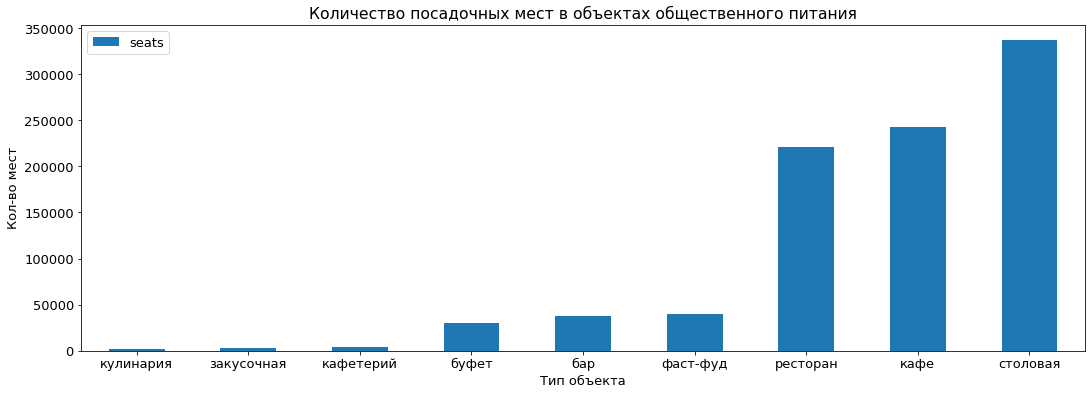

In [6]:
#Перманентно поменял настройки вывода графиков
from matplotlib import pylab
from pylab import *
pylab.rcParams['figure.figsize'] = (18.0, 6.0)
plt.rcParams.update({'font.size': 13})

objects = df_new.groupby('object_type').sum().reset_index()

ax = objects[['object_type', 'seats']]\
    .set_index('object_type')\
    .sort_values('seats', ascending=True)\
    .plot(figsize=(18, 6),kind='bar')

ax.set_ylabel('Кол-во мест')
ax.set_xlabel('Тип объекта')
ax.set_title('Количество посадочных мест в объектах общественного питания')

plt.xticks(rotation=0)
plt.legend()
plt.show();

In [7]:
seats = objects[['object_type', 'seats']].sort_values(by='seats',ascending=False).rename(columns={'seats': 'seats'})
seats['percent'] = seats['seats'] / seats['seats'].sum() * 100
seats

,object_type,seats,percent
7,столовая,336948,36.82
3,кафе,242228,26.47
6,ресторан,221266,24.18
8,фаст-фуд,39522,4.32
0,бар,37231,4.07
1,буфет,29911,3.27
4,кафетерий,3631,0.40
2,закусочная,2739,0.30
5,кулинария,1526,0.17


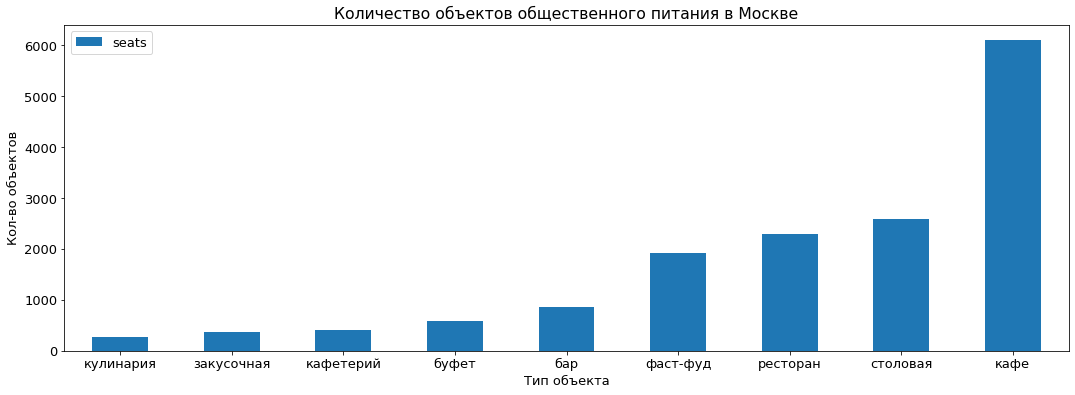

In [8]:
objects = df_new.groupby('object_type').count().reset_index()
ax = objects[['object_type', 'seats']].set_index('object_type').sort_values('seats', ascending=True).plot(kind='bar')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Кол-во объектов')
ax.set_title('Количество объектов общественного питания в Москве')
plt.xticks(rotation=0)
plt.show();

In [9]:
objects_count = objects[['object_type', 'seats']].sort_values(by='seats',ascending=False).rename(columns={'seats': 'count'})
objects_count['percent'] = objects_count['count'] / objects_count['count'].sum() * 100
objects_count

,object_type,count,percent
3,кафе,6099,39.69
7,столовая,2587,16.84
6,ресторан,2285,14.87
8,фаст-фуд,1923,12.51
0,бар,856,5.57
1,буфет,585,3.81
4,кафетерий,398,2.59
2,закусочная,360,2.34
5,кулинария,273,1.78


In [10]:
objects_count['count'].sum()

15366

### Вывод

Всего заведений 15366.<br>
По количеству заведений с большим отрывом лидирует кафе с долей 39.69%.<br>Следом идут столовые (16.84%), рестораны (14.87%), фаст-фуды (12.51%).<br>
Однако по количеству мест лидирует столовые с долей 36.82%, а рестораны (26.47%) и кафе (24.18%) не сильно отстают.
 


<a id='step_32'></a>
### 3.2 Cоотношение сетевых и несетевых заведений по количеству:

In [11]:
df_new.groupby('chain')['object_name'].count()

chain
не сетевое    12398
сетевое       2968 
Name: object_name, dtype: int64

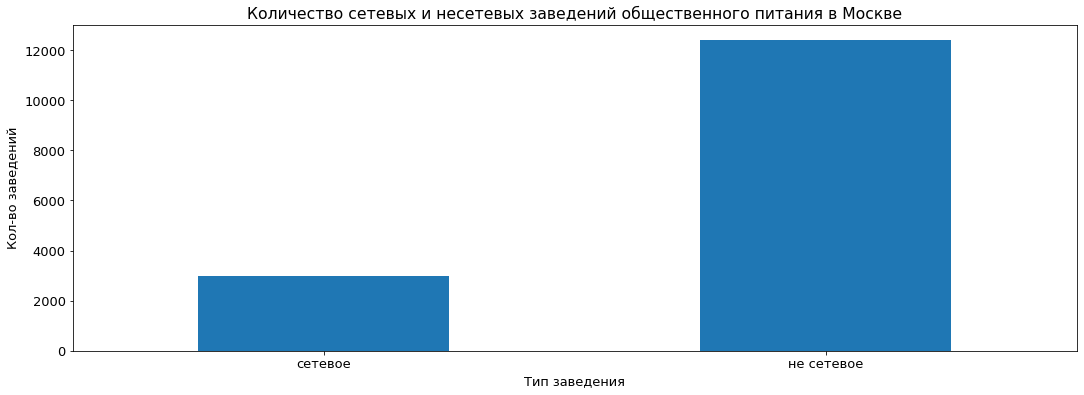

In [12]:
ax = df_new.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Кол-во заведений')
ax.set_title('Количество сетевых и несетевых заведений общественного питания в Москве')
plt.xticks(rotation=0)
plt.show();

### Вывод

Несетевых заведений в 4 раза больше, чем сетевых.

<a id='step_33'></a>
### 3.3 Какие типы заведений преимущественно сетевые:


In [13]:
chain_count = df_new.groupby(['object_type','chain']).count().rename(columns={'seats': 'count'})['count'].to_frame()
chain_count = chain_count.pivot_table(index = 'object_type', columns = ['chain'], values = 'count')
chain_count['процент сетевых'] = chain_count['сетевое'] / (chain_count['не сетевое'] + chain_count['сетевое'])
chain_count['соотношение'] = \
chain_count['не сетевое'].max() * (chain_count['сетевое'] / (chain_count['не сетевое'] + chain_count['сетевое']))
chain_count

chain,не сетевое,сетевое,процент сетевых,соотношение
object_type,,,,
бар,819,37,0.04,203.28
буфет,574,11,0.02,88.43
закусочная,304,56,0.16,731.58
кафе,4703,1396,0.23,"1,076.47"
кафетерий,346,52,0.13,614.46
кулинария,195,78,0.29,"1,343.71"
ресторан,1741,544,0.24,"1,119.66"
столовая,2584,3,0.00,5.45
фаст-фуд,1132,791,0.41,"1,934.52"


На графике соотношение показывает процент сетевых заведений от общего количества по типам (для наглядности за 100% взято наибольшее значение)

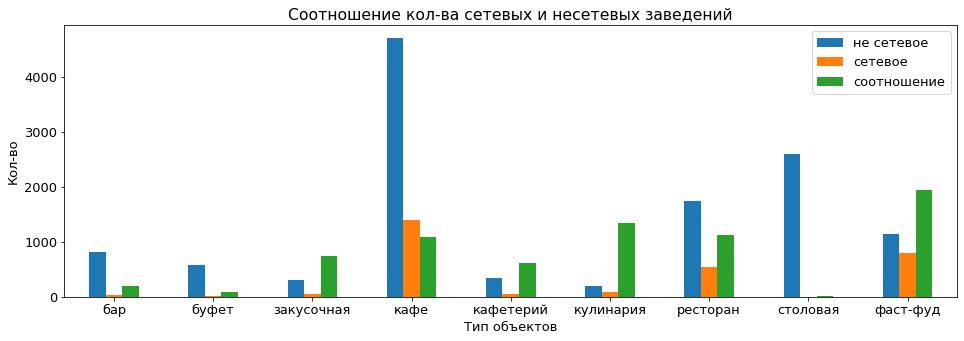

In [14]:
chain_count[['не сетевое','сетевое','соотношение']].plot(kind="bar", figsize=(16,5))

plt.xticks(rotation=0)
plt.title('Соотношение кол-ва сетевых и несетевых заведений')
plt.xlabel('Тип объектов')
plt.ylabel('Кол-во')
plt.legend()
plt.show();

### Вывод

* Сетевых столовых практически нет. 
* В основном сетевыми являются кафе, фаст-фуды и рестораны. 
* Не сетевых кафе почти 3.5 раза больше, чем сетевых.
* Если брать соотношение каждого отдельного типа, то фаст-фуд на первом месте c 40%. Следом идут кулинарии (29%), рестораны (24%) и кафе (23%).

<a id='step_34'></a>
### 3.4 Сетевые заведения. Количество заведений vs Количество посадочных мест:


In [15]:
net_objects = df_new.query('chain == "сетевое"')

**Распределение заведений по количеству посадочных мест**

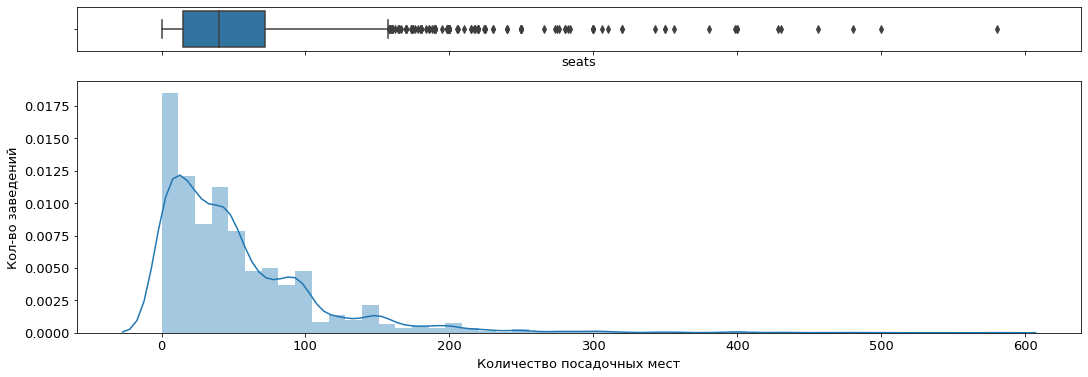

In [16]:
printmd('**{:^24s}**'.format("Распределение заведений по количеству посадочных мест"))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(net_objects["seats"], ax=ax_box)
sns.distplot(net_objects["seats"], ax=ax_hist, norm_hist=True)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Кол-во заведений');

In [17]:
net_objects['seats'].describe()

count   2,968.00
mean    52.92   
std     57.14   
min     0.00    
25%     15.00   
50%     40.00   
75%     72.00   
max     580.00  
Name: seats, dtype: float64

### Вывод

Для сетевых компаний выгодней открывать несколько заведений с малым количеством мест. Среднее значение 53 места. Малым количеством мест можно считать заведения от 15 до 40 посадочных мест.

<a id='step_35'></a>
### 3.5 Анализ посадочных мест:


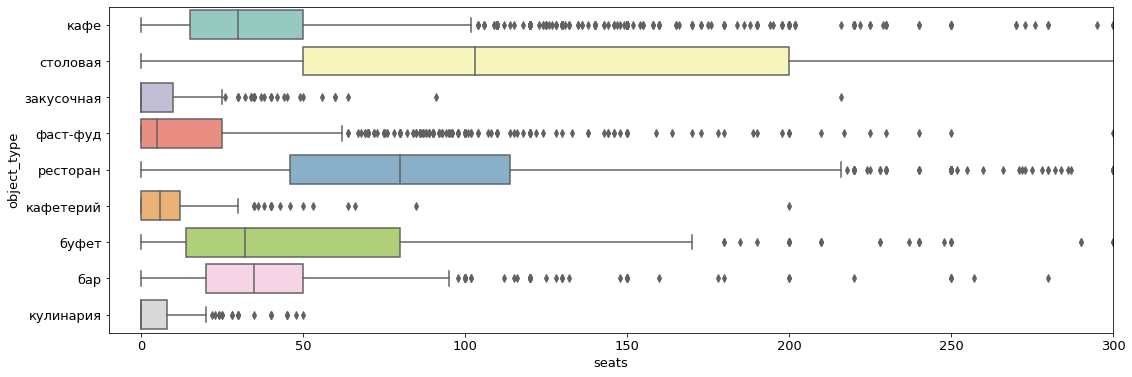

In [18]:
ax = sns.boxplot(x='seats', y='object_type', data=df_new, palette="Set3")
ax.set_xlim(-10,300)
plt.show();

In [19]:
df_new.groupby('object_type')['seats'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
закусочная,360.00,7.61,16.65,0.00,0.00,0.00,10.00,216.00
кулинария,273.00,5.59,9.87,0.00,0.00,0.00,8.00,50.00
фаст-фуд,"1,923.00",20.55,38.37,0.00,0.00,5.00,25.00,580.00
кафетерий,398.00,9.12,14.64,0.00,0.00,6.00,12.00,200.00
кафе,"6,099.00",39.72,37.72,0.00,15.00,30.00,50.00,533.00
буфет,585.00,51.13,56.33,0.00,14.00,32.00,80.00,320.00
бар,856.00,43.49,67.08,0.00,20.00,35.00,50.00,"1,700.00"
ресторан,"2,285.00",96.83,94.76,0.00,46.00,80.00,114.00,"1,500.00"
столовая,"2,587.00",130.25,95.18,0.00,50.00,103.00,200.00,"1,400.00"


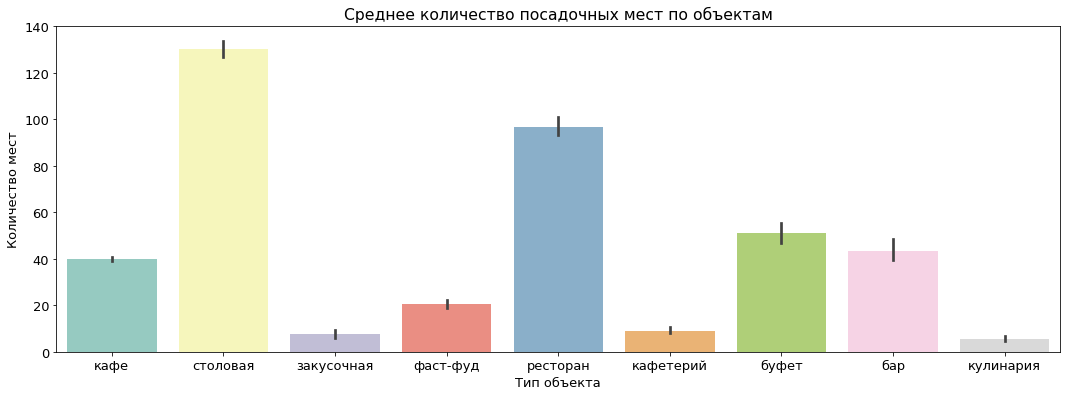

In [20]:
ax = sns.barplot(x='object_type', y='seats', data=df_new, palette="Set3")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Среднее количество посадочных мест по объектам')
plt.xticks(rotation=0)
plt.show();

### Вывод

По общему количеству посадочных мест лидирует столовая, в среднем 130 мест. Далее идут: ресторан - 97, буфет - 56, бар - 43, кафе - 40.

## 4. Анализ месторасположений заведений

<a id='step_41'></a>
### 4.1 Топ-10. Районы и улицы лидирующие по количеству объектов общепита:


Добавил столбец `streets`, который содержит только улицы.

In [21]:
streets_only = []
for street in df_new['address']:  
    start = street.find('город москва')
    end = street.find('дом')
    if end == -1:
        end = street.find('корпус')
    streets_only.append(street[start+12:end-1])

In [22]:
df_new['street'] = streets_only
df_new.head(10)

,id,object_name,chain,object_type,address,seats,street
0,151635,сметана,не сетевое,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,не сетевое,кафе,город москва улица талалихина дом 21 корпус 1,35,улица талалихина
2,24309,кафе академия,не сетевое,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица
4,119365,кафе вишневая метель,не сетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица
5,27429,стол. при гоу сош 1051,не сетевое,столовая,город москва абрамцевская улица дом 15 корпус 1,240,абрамцевская улица
6,148815,брусника,сетевое,кафе,город москва переулок сивцев вражек дом 62,10,переулок сивцев вражек
7,20957,буфет мтуси,не сетевое,столовая,город москва авиамоторная улица дом 8 строение 1,90,авиамоторная улица
8,20958,кпф семья-1,не сетевое,столовая,город москва авиамоторная улица дом 8 строение 1,150,авиамоторная улица
9,28858,столовая мтуси,не сетевое,столовая,город москва авиамоторная улица дом 8 строение 1,120,авиамоторная улица


Вывел топ-10 улиц.

In [23]:
temp = df_new.groupby('street').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = temp[['street','id']].rename({'id':'objects_count'}, axis='columns')
top_10

,street,objects_count
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,170
3,пресненская набережная,167
4,варшавское шоссе,155
5,ленинский проспект,147
6,проспект вернадского,131
7,город зеленоград,129
8,кутузовский проспект,114
9,каширское шоссе,103


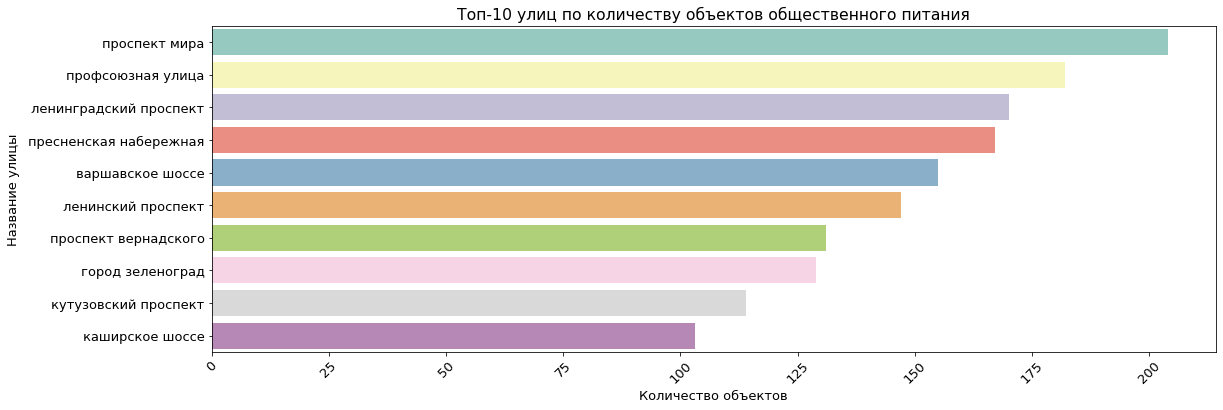

In [24]:
ax = sns.barplot(x='objects_count', y='street', data=top_10, palette="Set3")
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation=45)
plt.show();

### Вывод

Улицы охватывают районы
* Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино
* Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
* Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский
* Пресненская набережная: Пресненский
* Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный
* Ленинский проспект: Гагаринский и Донской
* Проспект Вернадского: Проспект Вернадского
* Город Зеленоград: Крюково, Матушкино, Савёлки, Силино и Старое Крюково
* Кутузовский проспект: Дорогомилово, Фили-Давыдково
* Каширское шоссе: Нагатино-Садовники и Нагорный

<a id='step_42'></a>
### 4.2 Районы Москвы, где улицы c одним объектом общепита:


In [25]:
temp = df_new.groupby('street').count()
temp = temp.query('id == 1').reset_index()
lone_obj = list(temp['street'])
len(lone_obj)

800

In [26]:
lone_obj = df_new[df_new['street'].isin(lone_obj)]
lone_obj

,id,object_name,chain,object_type,address,seats,street
19,153644,американская лаборатория десертов,не сетевое,кафе,город москва филипповский переулок дом 155,20,филипповский переулок
61,21214,столовая,не сетевое,столовая,город москва бабаевская улица дом 3,90,бабаевская улица
69,22139,хуанхэ,не сетевое,ресторан,город москва 1-й балтийский переулок дом 325,60,1-й балтийский переулок
81,25833,азербайджан,не сетевое,ресторан,город москва улица демьяна бедного дом 4,180,улица демьяна бедного
131,150881,вгик,не сетевое,столовая,город москва будайская улица дом 3,45,будайская улица
...,...,...,...,...,...,...,...
15015,208239,газпромнефть,не сетевое,кафе,поселение мосрентген деревня дудкино владение 1,20,осрентген деревня дудкино владение
15016,221225,пекарня есть поесть,не сетевое,кафе,город москва поселение сосенское послок коммунарка улица липовый парк владение 5 корпус 1 строение 1,16,поселение сосенское послок коммунарка улица липовый парк владение 5
15017,205588,кофейня,не сетевое,кафетерий,город москва поселение щаповское улица евгения родионова владение 1,16,поселение щаповское улица евгения родионова владение
15027,208936,кафе гурман,не сетевое,кафе,город москва поселение первомайское деревня фоминское лесная улица владение 14,40,поселение первомайское деревня фоминское лесная улица владение


In [27]:
key = '7d0b4783-bf82-4765-9e35-2eec2eb09739'

def getCoords(address):
    url = 'https://geocode-maps.yandex.ru/1.x/?apikey='
    r = requests.get(str(url) + str(key) + '&format=json&geocode=' + str(address) + '&kind=metro&results=1').json()
    try:
        return r['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
    except Exception as e:
        print(e)

In [ ]:
lone_obj['coords'] = ""

for index in lone_obj.index.unique():
    if not re.match(r'[0-9.]{2}.[0-9]*', lone_obj.loc[index,'coords'], flags=0):
        try:
            lone_obj.loc[index,'coords'] = getCoords(lone_obj.loc[index,'address'])
            print('Добавлено: ',lone_obj.loc[index,'address'])
        except:
            lone_obj.loc[index,'coords'] = 0
            print('Пропуск (нет информации): ',lone_obj.loc[index,'address'])
            continue
    else:
        print('Пропуск (координаты уже существуют)')

In [29]:
lone_obj.head(5)

,id,object_name,chain,object_type,address,seats,street,coords
19,153644,американская лаборатория десертов,не сетевое,кафе,город москва филипповский переулок дом 155,20,филипповский переулок,37.59833 55.749035
61,21214,столовая,не сетевое,столовая,город москва бабаевская улица дом 3,90,бабаевская улица,37.689069 55.790595
69,22139,хуанхэ,не сетевое,ресторан,город москва 1-й балтийский переулок дом 325,60,1-й балтийский переулок,37.518551 55.809757
81,25833,азербайджан,не сетевое,ресторан,город москва улица демьяна бедного дом 4,180,улица демьяна бедного,37.48693 55.770401
131,150881,вгик,не сетевое,столовая,город москва будайская улица дом 3,45,будайская улица,37.665156 55.831903


In [30]:
key = '3e9a1fdb-24d4-420f-bec4-2a9d3e03f048'

def getStation(coords):
    url = 'https://geocode-maps.yandex.ru/1.x/?apikey='
    r = requests.get(str(url) + str(key) + '&format=json&geocode=' + str(coords) + '&kind=metro&results=1').json()
    try:
        return r['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['name']
    except Exception as e:
        print(e)

In [31]:
for index in lone_obj.index.unique():
    try:
        lone_obj.loc[index,'station'] = getStation(lone_obj.loc[index,'coords'])
        print('Добавлено: ',lone_obj.loc[index,'address'])
    except:
        lone_obj.loc[index,'coords'] = 0
        print('Пропуск (нет информации): ',lone_obj.loc[index,'address'])
        continue

Добавлено:  город москва филипповский переулок дом 155
Добавлено:  город москва бабаевская улица дом 3
Добавлено:  город москва 1-й балтийский переулок дом 325
Добавлено:  город москва улица демьяна бедного дом 4
Добавлено:  город москва будайская улица дом 3
Добавлено:  город москва нахимовский проспект владение 75а
Добавлено:  город москва варсонофьевский переулок дом 6
Добавлено:  город москва верхняя улица дом 3 корпус 2
Добавлено:  город москва глазовский переулок дом 5
Добавлено:  город москва воротниковский переулок дом 11 строение 1
Добавлено:  город москва 2-й вышеславцев переулок дом 17
Добавлено:  город москва гвардейская улица дом 15 корпус 1
Добавлено:  город москва глебовская улица дом 10
Добавлено:  город москва улица девятая рота дом 14
Добавлено:  город москва улица генерала ермолова дом 4
Добавлено:  город москва улица жебрунова дом 4
Добавлено:  город москва улица бориса жигулнкова дом 15
Добавлено:  город москва улица жуковского дом 5
Добавлено:  город москва 2-й ко

In [32]:
lone_obj.head(5)

,id,object_name,chain,object_type,address,seats,street,coords,station
19,153644,американская лаборатория десертов,не сетевое,кафе,город москва филипповский переулок дом 155,20,филипповский переулок,37.59833 55.749035,метро Арбатская
61,21214,столовая,не сетевое,столовая,город москва бабаевская улица дом 3,90,бабаевская улица,37.689069 55.790595,метро Сокольники
69,22139,хуанхэ,не сетевое,ресторан,город москва 1-й балтийский переулок дом 325,60,1-й балтийский переулок,37.518551 55.809757,метро Сокол
81,25833,азербайджан,не сетевое,ресторан,город москва улица демьяна бедного дом 4,180,улица демьяна бедного,37.48693 55.770401,станция Хорошёво
131,150881,вгик,не сетевое,столовая,город москва будайская улица дом 3,45,будайская улица,37.665156 55.831903,станция Ростокино


In [33]:
spreadsheet_id = '1myEPxxpUbFVD6UGX0PF3_v3QM6AtleH9R4ldFGFj4Rk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
lone_obj = pd.read_csv(BytesIO(r.content))
lone_obj.head(5)

,id,object_name,chain,object_type,address,seats,street,coords,station
0,153644,американская лаборатория десертов,несетевое,кафе,город москва филипповский переулок дом 155,20,филипповский переулок,37.59833 55.749035,метро Арбатская
1,21214,столовая,несетевое,столовая,город москва бабаевская улица дом 3,90,бабаевская улица,37.689069 55.790595,метро Сокольники
2,22139,хуанхэ,несетевое,ресторан,город москва 1-й балтийский переулок дом 325,60,1-й балтийский переулок,37.518551 55.809757,метро Сокол
3,25833,азербайджан,несетевое,ресторан,город москва улица демьяна бедного дом 4,180,улица демьяна бедного,37.48693 55.770401,станция Хорошёво
4,150881,вгик,несетевое,столовая,город москва будайская улица дом 3,45,будайская улица,37.665156 55.831903,станция Ростокино


In [34]:
station_count = lone_obj.groupby('station').count().drop(['Ноне']).sort_values('id',ascending=False)
station_count = station_count[['id']].rename(columns={'id': 'street_count'}).head(10).reset_index()
station_count

,station,street_count
0,метро Рассказовка,22
1,метро Коммунарка,22
2,метро Бабушкинская,16
3,метро Марьина Роща,12
4,метро Сокольники,12
5,метро Смоленская,11
6,метро Арбатская,11
7,метро Таганская,10
8,метро Медведково,9
9,метро Преображенская площадь,9


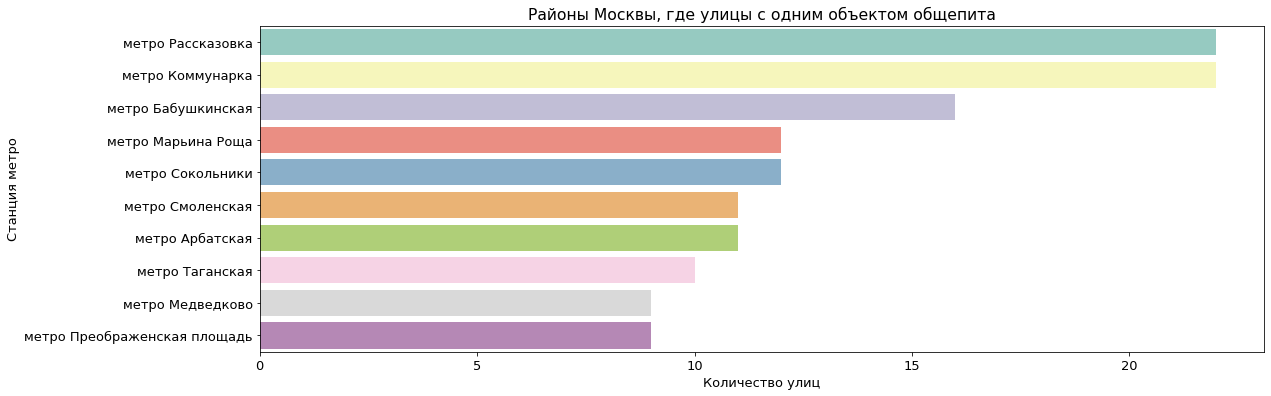

In [35]:
ax = sns.barplot(x='street_count', y='station', data=station_count, palette="Set3")
ax.set_xlabel('Количество улиц')
ax.set_ylabel('Станция метро')
ax.set_title('Районы Москвы, где улицы c одним объектом общепита')
plt.show();

### Вывод

Больше всего улиц с одним заведением - Рассказовка и Коммунарка. Бабушкинская в топ-3.

<a id='step_38'></a>
### 4.3 Распределение количества посадочных мест для улиц с большим количеством объектов общепита:


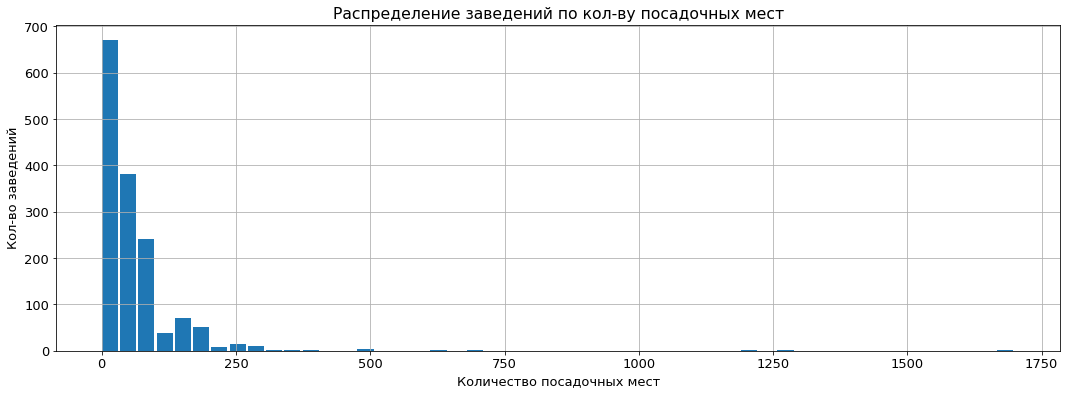

In [36]:
temp = df_new[df_new['street'].isin(list(top_10['street']))]
temp['seats'].hist(bins=50,width=30)

plt.title('Распределение заведений по кол-ву посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Кол-во заведений')
plt.show();

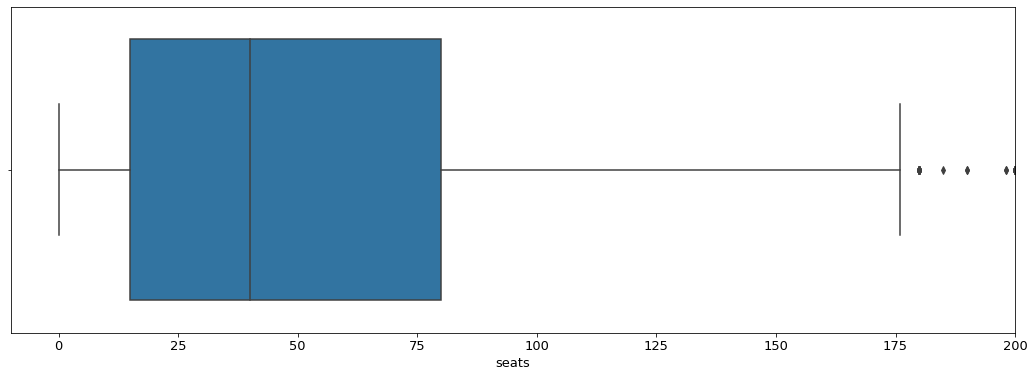

In [37]:
ax = sns.boxplot(x=temp['seats'])
ax.set_xlim(-10,200)
plt.show();

In [38]:
temp['seats'].describe()

count   1,502.00
mean    60.41   
std     89.56   
min     0.00    
25%     15.00   
50%     40.00   
75%     80.00   
max     1,700.00
Name: seats, dtype: float64

In [39]:
temp.groupby('street')['seats'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
профсоюзная улица,182.00,46.41,56.15,0.00,5.00,24.00,63.75,240.00
варшавское шоссе,155.00,53.97,76.03,0.00,9.00,30.00,67.00,500.00
каширское шоссе,103.00,59.04,90.35,0.00,9.50,30.00,80.00,680.00
пресненская набережная,167.00,45.84,65.32,0.00,8.50,30.00,50.00,478.00
кутузовский проспект,114.00,85.06,194.46,0.00,20.00,40.00,96.00,"1,700.00"
ленинградский проспект,170.00,52.94,63.28,0.00,15.25,40.00,70.00,625.00
проспект вернадского,131.00,66.06,121.88,0.00,20.00,40.00,80.00,"1,288.00"
ленинский проспект,147.00,63.47,67.97,0.00,20.00,45.00,80.00,495.00
проспект мира,204.00,62.70,58.97,0.00,20.00,46.50,90.00,326.00


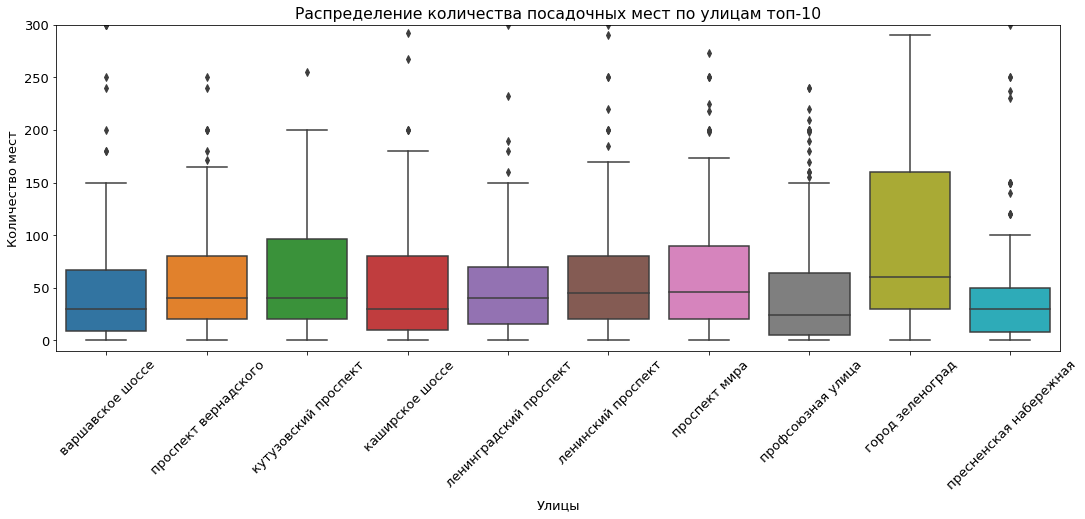

In [40]:
ax = sns.boxplot(x="street", y="seats", data=temp, orient='v')
plt.xticks(rotation=45)
ax.set_ylim(-10,300)

ax.set_xlabel('Улицы')
ax.set_ylabel('Количество мест')
ax.set_title('Распределение количества посадочных мест по улицам топ-10')
plt.show();

### Вывод

По большему счету, на улицах с большим количеством объектов общественного питания, находятся заведения с 40 посадочными местами. Больших площадей нет.

<a id='step_4'></a>
## 4. Ссылка на презентацию:

Презентация: https://yadi.sk/i/Ula2b3lVaxTajg

<a id='step_5'></a>
## 5. Общий вывод:

Поскольку у нас оригинальное кафе с высокой конкурентноспособностью,  по проанализированной информации выделил рекомендации:

* Тип кафе - не сетевой.
* Количество посадочных мест, в зависимости от бюджета: минимум - 15, оптимально - 40.
* Расположения в районе станции метро «Проспект Мира» или «Профсоюзная».

При успешном исходе дела, можно открыть еще несколько заведений возле станций метро из топ-10.